In [237]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sqlalchemy import create_engine 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # Holt Winter's Exponential Smoothing
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.pipeline import Pipeline
import pickle, joblib




In [111]:
# Loading data
df = pd.read_csv(r"C:\Users\MsK_PC\360digiTMG\Data_Science\DS_TMT_Steel_Project\Client_data\Dataset.csv")

In [112]:
df

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,Rate,Value
0,04-03-2017,FY 18,25MM TATA TISCON FE500D (S),25 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,25.49,40000.0,1019600.0
1,04-03-2017,FY 18,08MM TATA TISCON FE500D (S),08 MM,08 MM,500D,FULL LENGTH,12 METER,Sales,9.09,43200.0,392688.0
2,04-03-2017,FY 18,10MM TATA TISCON FE500D (S),10 MM,10 MM,500D,FULL LENGTH,12 METER,Sales,3.94,41700.0,164298.0
3,04-03-2017,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,41200.0,79516.0
4,04-03-2017,FY 18,16MM TATA TISCON FE500D (S),16 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.03,41200.0,42436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33040,3/25/2023,FY 23,20MM TATA TISCON FE500D (T),20 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,4.08,60000.0,244800.0
33041,3/30/2023,FY 23,08MM TATA TISCON FE550D (T),08 MM,08 MM,550D,FULL LENGTH,12 METER,Credit Note,-1.07,61000.0,-65270.0
33042,3/30/2023,FY 23,10MM TATA TISCON FE550D (T),10 MM,10 MM,550D,FULL LENGTH,12 METER,Credit Note,-1.50,60000.0,-90000.0
33043,3/30/2023,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Credit Note,-20.04,59000.0,-1182360.0


In [113]:
#checking for duplicates
d=df.duplicated()

In [114]:
sum(d)

66

In [115]:
# Droping duplicates
df1 = df.drop_duplicates()

In [116]:
df1

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,Rate,Value
0,04-03-2017,FY 18,25MM TATA TISCON FE500D (S),25 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,25.49,40000.0,1019600.0
1,04-03-2017,FY 18,08MM TATA TISCON FE500D (S),08 MM,08 MM,500D,FULL LENGTH,12 METER,Sales,9.09,43200.0,392688.0
2,04-03-2017,FY 18,10MM TATA TISCON FE500D (S),10 MM,10 MM,500D,FULL LENGTH,12 METER,Sales,3.94,41700.0,164298.0
3,04-03-2017,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,41200.0,79516.0
4,04-03-2017,FY 18,16MM TATA TISCON FE500D (S),16 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.03,41200.0,42436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33040,3/25/2023,FY 23,20MM TATA TISCON FE500D (T),20 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,4.08,60000.0,244800.0
33041,3/30/2023,FY 23,08MM TATA TISCON FE550D (T),08 MM,08 MM,550D,FULL LENGTH,12 METER,Credit Note,-1.07,61000.0,-65270.0
33042,3/30/2023,FY 23,10MM TATA TISCON FE550D (T),10 MM,10 MM,550D,FULL LENGTH,12 METER,Credit Note,-1.50,60000.0,-90000.0
33043,3/30/2023,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Credit Note,-20.04,59000.0,-1182360.0


In [117]:
# Segregating data based on their data types
numeric_features = df1.select_dtypes(include = ['float64']).columns
numeric_features



Index(['Quantity', 'Rate', 'Value'], dtype='object')

In [118]:
#outlier pipeline
winsor = Winsorizer(capping_method = 'iqr', # choose  IQR rule boundaries or gaussian for mean and std
                          tail = 'both', # cap left, right or both tails 
                          fold = 1.5,
                          variables = ['Quantity', 'Rate', 'Value'])
outlier_pipeline = Pipeline(steps = [('winsor', winsor)])
outlier_pipeline


preprocessor1 = ColumnTransformer(transformers = [('wins', 
                                                   outlier_pipeline,
                                                   numeric_features)], 
                                  remainder = 'drop') # Drop all other columns
print(preprocessor1)


# Fit the data 
winz_data = preprocessor1.fit(df1)

# Save the pipeline
joblib.dump(winz_data, 'winzor')

#filtered_data  = pd.DataFrame(winz_data.transform(df1), columns= numeric_features)
#filtered_data .info()



ColumnTransformer(transformers=[('wins',
                                 Pipeline(steps=[('winsor',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both',
                                                             variables=['Quantity',
                                                                        'Rate',
                                                                        'Value']))]),
                                 Index(['Quantity', 'Rate', 'Value'], dtype='object'))])


['winzor']

<Axes: >

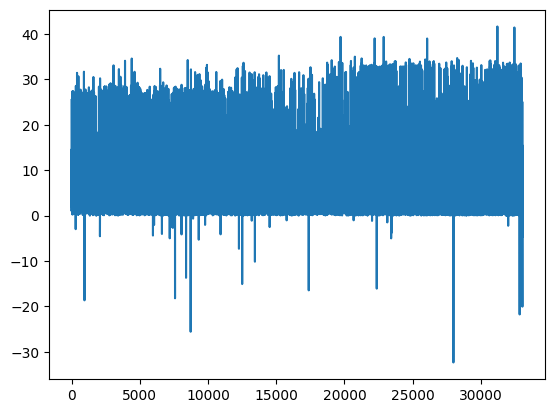

In [119]:
df1.Quantity.plot()

In [120]:
# Converting the data type of Date column
df1['Date'] = pd.to_datetime(df1['Date'], format= 'mixed')

C:\Users\MsK_PC\AppData\Local\Temp\ipykernel_5896\4259109642.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Date'] = pd.to_datetime(df1['Date'], format= 'mixed')


In [121]:
df1

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,Rate,Value
0,2017-04-03,FY 18,25MM TATA TISCON FE500D (S),25 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,25.49,40000.0,1019600.0
1,2017-04-03,FY 18,08MM TATA TISCON FE500D (S),08 MM,08 MM,500D,FULL LENGTH,12 METER,Sales,9.09,43200.0,392688.0
2,2017-04-03,FY 18,10MM TATA TISCON FE500D (S),10 MM,10 MM,500D,FULL LENGTH,12 METER,Sales,3.94,41700.0,164298.0
3,2017-04-03,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,41200.0,79516.0
4,2017-04-03,FY 18,16MM TATA TISCON FE500D (S),16 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.03,41200.0,42436.0
...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2023-03-25,FY 23,20MM TATA TISCON FE500D (T),20 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,4.08,60000.0,244800.0
33041,2023-03-30,FY 23,08MM TATA TISCON FE550D (T),08 MM,08 MM,550D,FULL LENGTH,12 METER,Credit Note,-1.07,61000.0,-65270.0
33042,2023-03-30,FY 23,10MM TATA TISCON FE550D (T),10 MM,10 MM,550D,FULL LENGTH,12 METER,Credit Note,-1.50,60000.0,-90000.0
33043,2023-03-30,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Credit Note,-20.04,59000.0,-1182360.0


In [122]:
# Filtering data for "12mm" diameter
df2 = df1[df1["dia"]=="12 MM"]


In [123]:
df2

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,Rate,Value
3,2017-04-03,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,41200.00,79516.00
7,2017-04-04,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,15.24,37976.19,578757.14
10,2017-04-06,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,14.62,41500.00,606730.00
25,2017-04-06,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,3.03,41000.00,124230.00
33,2017-04-07,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,5.15,40800.00,210120.00
...,...,...,...,...,...,...,...,...,...,...,...,...
33024,2023-03-07,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,9.98,61950.00,618261.00
33027,2023-03-10,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,15.16,63200.00,958112.00
33031,2023-03-23,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Sales A/c GST,2.09,60400.00,126236.00
33038,2023-03-25,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,8.66,60000.00,519600.00


In [124]:
# Extract the month from the 'Date' column
df2['Month'] = df2['Date'].dt.month


C:\Users\MsK_PC\AppData\Local\Temp\ipykernel_5896\1073861151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Date'].dt.month


In [125]:
df2

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,Rate,Value,Month
3,2017-04-03,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,41200.00,79516.00,4
7,2017-04-04,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,15.24,37976.19,578757.14,4
10,2017-04-06,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,14.62,41500.00,606730.00,4
25,2017-04-06,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,3.03,41000.00,124230.00,4
33,2017-04-07,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,5.15,40800.00,210120.00,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,2023-03-07,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,9.98,61950.00,618261.00,3
33027,2023-03-10,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,15.16,63200.00,958112.00,3
33031,2023-03-23,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Sales A/c GST,2.09,60400.00,126236.00,3
33038,2023-03-25,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,8.66,60000.00,519600.00,3


In [126]:
import calendar
# Map numeric month values to month names using the calendar module
df2['Month'] = df2['Month'].apply(lambda x: calendar.month_name[x])

C:\Users\MsK_PC\AppData\Local\Temp\ipykernel_5896\145779422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Month'].apply(lambda x: calendar.month_name[x])


In [127]:
df2

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,Rate,Value,Month
3,2017-04-03,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,41200.00,79516.00,April
7,2017-04-04,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,15.24,37976.19,578757.14,April
10,2017-04-06,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,14.62,41500.00,606730.00,April
25,2017-04-06,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,3.03,41000.00,124230.00,April
33,2017-04-07,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,5.15,40800.00,210120.00,April
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,2023-03-07,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,9.98,61950.00,618261.00,March
33027,2023-03-10,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,15.16,63200.00,958112.00,March
33031,2023-03-23,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Sales A/c GST,2.09,60400.00,126236.00,March
33038,2023-03-25,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,8.66,60000.00,519600.00,March


In [128]:
month_dummies = pd.DataFrame(pd.get_dummies(df2['Month']))
df3 = pd.concat([df2, month_dummies], axis = 1)
df3 = df3.drop(columns = "Month")

In [129]:
df3

,Date,FY,Products,dia,dia group,grade,type,length,Voucher Type,Quantity,...,December,February,January,July,June,March,May,November,October,September
3,2017-04-03,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,1.93,...,False,False,False,False,False,False,False,False,False,False
7,2017-04-04,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,15.24,...,False,False,False,False,False,False,False,False,False,False
10,2017-04-06,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,14.62,...,False,False,False,False,False,False,False,False,False,False
25,2017-04-06,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,3.03,...,False,False,False,False,False,False,False,False,False,False
33,2017-04-07,FY 18,12MM TATA TISCON FE500D (S),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales,5.15,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,2023-03-07,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,9.98,...,False,False,False,False,False,True,False,False,False,False
33027,2023-03-10,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,15.16,...,False,False,False,False,False,True,False,False,False,False
33031,2023-03-23,FY 23,12MM TATA TISCON FE550D (T),12 MM,12 MM - 32 MM,550D,FULL LENGTH,12 METER,Sales A/c GST,2.09,...,False,False,False,False,False,True,False,False,False,False
33038,2023-03-25,FY 23,12MM TATA TISCON FE500D (T),12 MM,12 MM - 32 MM,500D,FULL LENGTH,12 METER,Sales A/c GST,8.66,...,False,False,False,False,False,True,False,False,False,False


In [137]:
df4 =df3.drop(['Products', 'dia', 'dia group','grade', 'type', 'length', 'Voucher Type', 'Rate'], axis=1)

In [138]:
df4

,Date,FY,Quantity,Value,April,August,December,February,January,July,June,March,May,November,October,September
3,2017-04-03,FY 18,1.93,79516.00,True,False,False,False,False,False,False,False,False,False,False,False
7,2017-04-04,FY 18,15.24,578757.14,True,False,False,False,False,False,False,False,False,False,False,False
10,2017-04-06,FY 18,14.62,606730.00,True,False,False,False,False,False,False,False,False,False,False,False
25,2017-04-06,FY 18,3.03,124230.00,True,False,False,False,False,False,False,False,False,False,False,False
33,2017-04-07,FY 18,5.15,210120.00,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33024,2023-03-07,FY 23,9.98,618261.00,False,False,False,False,False,False,False,True,False,False,False,False
33027,2023-03-10,FY 23,15.16,958112.00,False,False,False,False,False,False,False,True,False,False,False,False
33031,2023-03-23,FY 23,2.09,126236.00,False,False,False,False,False,False,False,True,False,False,False,False
33038,2023-03-25,FY 23,8.66,519600.00,False,False,False,False,False,False,False,True,False,False,False,False


In [139]:
df4.set_index('Date', inplace=True)


In [140]:
df4

,FY,Quantity,Value,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,,,,
2017-04-03,FY 18,1.93,79516.00,True,False,False,False,False,False,False,False,False,False,False,False
2017-04-04,FY 18,15.24,578757.14,True,False,False,False,False,False,False,False,False,False,False,False
2017-04-06,FY 18,14.62,606730.00,True,False,False,False,False,False,False,False,False,False,False,False
2017-04-06,FY 18,3.03,124230.00,True,False,False,False,False,False,False,False,False,False,False,False
2017-04-07,FY 18,5.15,210120.00,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-07,FY 23,9.98,618261.00,False,False,False,False,False,False,False,True,False,False,False,False
2023-03-10,FY 23,15.16,958112.00,False,False,False,False,False,False,False,True,False,False,False,False
2023-03-23,FY 23,2.09,126236.00,False,False,False,False,False,False,False,True,False,False,False,False


In [214]:
#d1.drop(d1.columns[1:19], axis=1, inplace=True)
# Calculate days elapsed since the first observation
df4['t'] = (df4.index - df4.index[0]).days  # Assuming an average of 30 days per month
df4["t_square"] = df4["t"] * df4["t"]


 # Quadratic trend or polynomial with '2' degrees trend is captured
df4["log_Quantity"] = np.log(df4["Quantity"]) # Exponential trend is captured


C:\Users\MsK_PC\anaconda3\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [215]:
df4

,FY,Quantity,Value,April,August,December,February,January,July,June,March,May,November,October,September,t,t_square,log_Quantity
Date,,,,,,,,,,,,,,,,,,
2017-04-03,FY 18,1.93,79516.00,True,False,False,False,False,False,False,False,False,False,False,False,0,0,0.657520
2017-04-04,FY 18,15.24,578757.14,True,False,False,False,False,False,False,False,False,False,False,False,1,1,2.723924
2017-04-06,FY 18,14.62,606730.00,True,False,False,False,False,False,False,False,False,False,False,False,3,9,2.682390
2017-04-06,FY 18,3.03,124230.00,True,False,False,False,False,False,False,False,False,False,False,False,3,9,1.108563
2017-04-07,FY 18,5.15,210120.00,True,False,False,False,False,False,False,False,False,False,False,False,4,16,1.638997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-07,FY 23,9.98,618261.00,False,False,False,False,False,False,False,True,False,False,False,False,2164,4682896,2.300583
2023-03-10,FY 23,15.16,958112.00,False,False,False,False,False,False,False,True,False,False,False,False,2167,4695889,2.718660
2023-03-23,FY 23,2.09,126236.00,False,False,False,False,False,False,False,True,False,False,False,False,2180,4752400,0.737164


In [216]:
# Handling missing values.
from feature_engine.imputation import RandomSampleImputer

random_imputer = RandomSampleImputer(['log_Quantity'])
df4["log_Quantity"] = pd.DataFrame(random_imputer.fit_transform(df4[["log_Quantity"]]))


df4

,FY,Quantity,Value,April,August,December,February,January,July,June,March,May,November,October,September,t,t_square,log_Quantity
Date,,,,,,,,,,,,,,,,,,
2017-04-03,FY 18,1.93,79516.00,True,False,False,False,False,False,False,False,False,False,False,False,0,0,0.657520
2017-04-04,FY 18,15.24,578757.14,True,False,False,False,False,False,False,False,False,False,False,False,1,1,2.723924
2017-04-06,FY 18,14.62,606730.00,True,False,False,False,False,False,False,False,False,False,False,False,3,9,2.682390
2017-04-06,FY 18,3.03,124230.00,True,False,False,False,False,False,False,False,False,False,False,False,3,9,1.108563
2017-04-07,FY 18,5.15,210120.00,True,False,False,False,False,False,False,False,False,False,False,False,4,16,1.638997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-07,FY 23,9.98,618261.00,False,False,False,False,False,False,False,True,False,False,False,False,2164,4682896,2.300583
2023-03-10,FY 23,15.16,958112.00,False,False,False,False,False,False,False,True,False,False,False,False,2167,4695889,2.718660
2023-03-23,FY 23,2.09,126236.00,False,False,False,False,False,False,False,True,False,False,False,False,2180,4752400,0.737164


In [217]:
# Data Partition
Train = df4.iloc[:len(df4)-365]
Test = df4.iloc[len(df4)-365:] # taking last one year

In [218]:
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1, 13))

####################### Linear ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Quantity ~ t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Quantity']) - np.array(pred_linear))**2))
rmse_linear


6.1622456253224955

In [220]:
#################### Quadratic ###############################

Quad = smf.ols('Quantity ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Quantity']) - np.array(pred_Quad))**2))
rmse_Quad



6.146305645133342

In [221]:
##################### Exponential ##############################

Exp = smf.ols('log_Quantity ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Quantity']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp


6.575227868961271

In [222]:
################### Additive Seasonality ########################

add_sea = smf.ols('Quantity ~ January + February + March + April + May + June + July + August + September + October + November + December', data = Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Quantity']) - np.array(pred_add_sea))**2))
rmse_add_sea



6.158771307208936

In [223]:
################## Additive Seasonality Quadratic Trend ############################

add_sea_Quad = smf.ols('Quantity ~ t + t_square + January + February + March + April + May + June + July + August + September + October + November', data = Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Quantity']) - np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

6.180181482619802

In [224]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_Quantity ~ January + February + March + April + May + June + July + August + September + October + November + December', data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Quantity']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea



6.4157196014867175

In [225]:
################## Multiplicative Seasonality Linear Trend  ###########

Mul_sea_linear = smf.ols('Quantity ~ t + January + February + March + April + May + June + July + August + September + October + November + December', data = Train).fit()
pred_Mult_sea_linear = pd.Series(Mul_sea_linear.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December', 't']]))
rmse_Mult_sea_linear = np.sqrt(np.mean((np.array(Test['Quantity']) - np.array(np.exp(pred_Mult_sea_linear)))**2))
rmse_Mult_sea_linear



91.01285369649932

<Axes: xlabel='Date'>

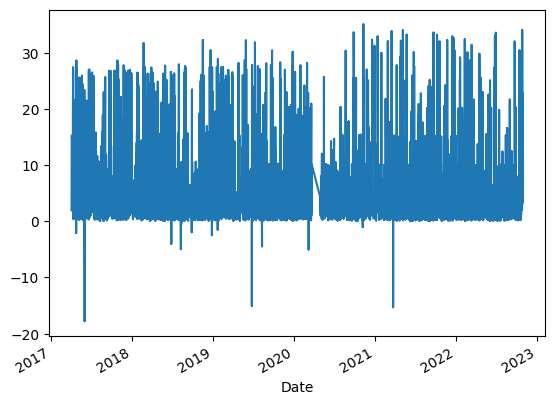

In [226]:
# Visualization - Time plot for the last year
Train.Quantity.plot()

In [227]:
################## Testing #######################################

Models = {"MODEL":pd.Series(["rmse_linear", "rmse_Exp", "rmse_Quad", "rmse_add_sea", "rmse_Mult_sea", "rmse_add_sea_quad", "rmse_Mult_sea_linear"]), "RMSE_Values":pd.Series([rmse_linear, rmse_Exp, rmse_Quad, rmse_add_sea, rmse_Mult_sea, rmse_add_sea_quad, rmse_Mult_sea_linear])}
table_rmse = pd.DataFrame(Models)
table_rmse


,MODEL,RMSE_Values
0,rmse_linear,6.162246
1,rmse_Exp,6.575228
2,rmse_Quad,6.146306
3,rmse_add_sea,6.158771
4,rmse_Mult_sea,6.415720
5,rmse_add_sea_quad,6.180181
6,rmse_Mult_sea_linear,91.012854


In [231]:
# 'rmse_Quad' has the least RMSE value among the models prepared so far. Use these features and build forecasting model using entire data
model_full = smf.ols('Quantity ~ t + t_square', data = df4).fit()

predict_data1 = pd.read_csv(r"C:\Users\MsK_PC\360digiTMG\Data_Science\DS_TMT_Steel_Project\Client_data\generated_data.csv")

pred_new  = pd.Series(model_full.predict(predict_data1))
pred_new




0      6.228300
1      6.226052
2      6.223805
3      6.221561
4      6.219317
         ...   
361    5.516526
362    5.514832
363    5.513140
364    5.511449
365    5.509760
Length: 366, dtype: float64

In [232]:
predict_data1["forecasted_Quantity"] = pd.Series(pred_new)


In [233]:
predict_data1

,Unnamed: 0,t,t_square,dia,forecasted_Quantity
0,01-01-2024,0,0,12 MM,6.228300
1,02-01-2024,1,1,12 MM,6.226052
2,03-01-2024,2,4,12 MM,6.223805
3,04-01-2024,3,9,12 MM,6.221561
4,05-01-2024,4,16,12 MM,6.219317
...,...,...,...,...,...
361,27-12-2024,361,130321,12 MM,5.516526
362,28-12-2024,362,131044,12 MM,5.514832
363,29-12-2024,363,131769,12 MM,5.513140
364,30-12-2024,364,132496,12 MM,5.511449


In [234]:
# The models and results have save and load method, so you don't need to use the pickle module directly.
# to save model
model_full.save("model_with_noise.pickle")

import os
os.getcwd()

# to load model
from statsmodels.regression.linear_model import OLSResults
model = OLSResults.load("model_with_noise.pickle")



In [235]:
# RESIDUALS MIGHT HAVE ADDITIONAL INFORMATION!

# Autoregression Model (AR)
# Calculating Residuals from best model applied on full data
# AV - FV
full_res = df4.Quantity - model.predict(df4)

full_res

Date
2017-04-03    -4.298300
2017-04-04     9.013948
2017-04-06     8.398439
2017-04-06    -3.191561
2017-04-07    -1.069317
                ...    
2023-03-07     5.024163
2023-03-10    10.200938
2023-03-23    -2.883196
2023-03-25     3.684606
2023-03-30   -25.020914
Length: 6557, dtype: float64

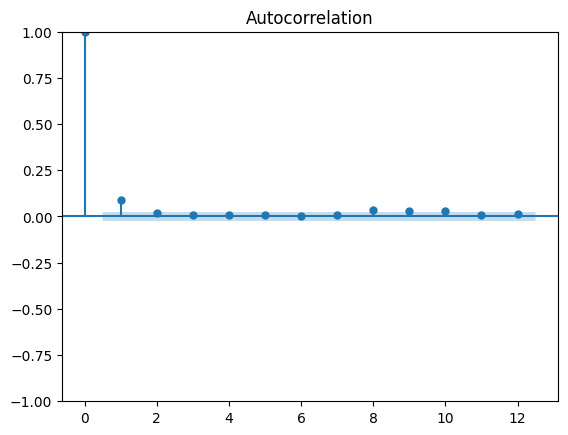

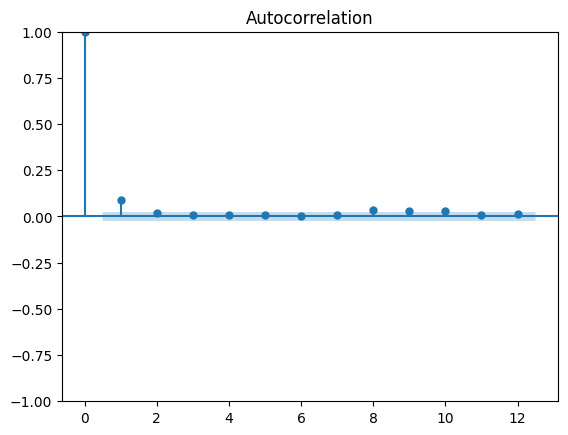

In [161]:
# ACF plot on residuals
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(full_res, lags = 12)
# ACF is an (complete) auto-correlation function gives values 
# of auto-correlation of any time series with its lagged values.


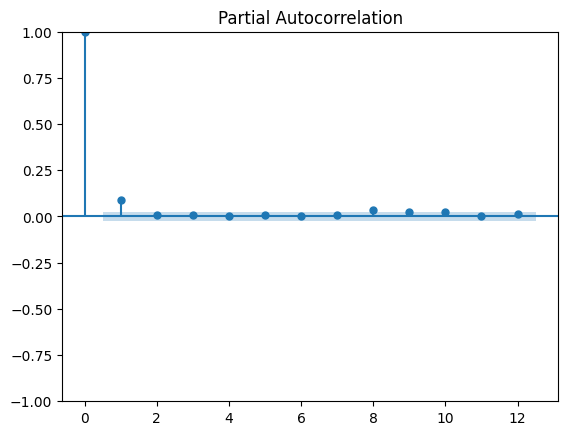

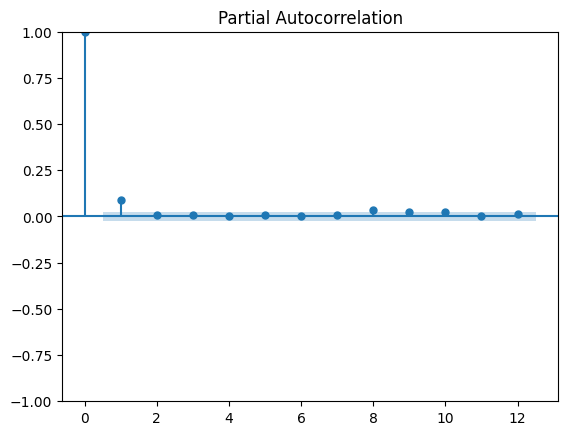

In [162]:
# PACF is a partial auto-correlation function. 
# It finds correlations of Y with lags of the residuals of the time series 
tsa_plots.plot_pacf(full_res, lags = 12)


In [163]:
# Alternative approach for ACF plot is explained in next 2 lines
# from pandas.plotting import autocorrelation_plot
# autocorrelation_ppyplot.show()
                          
# AR Autoregressive model
from statsmodels.tsa.ar_model import AutoReg
model_ar = AutoReg(full_res, lags = [1])
model_fit = model_ar.fit()

print('Coefficients: %s' % model_fit.params)


Coefficients: const    0.000316
y.L1     0.087598
dtype: float64


C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [164]:

pred_res = model_fit.predict(start = len(full_res), end = len(full_res) + len(predict_data1) - 1, dynamic = False)
pred_res.reset_index(drop = True, inplace = True)

# The Final Predictions using ASQT and AR(1) Model
final_pred = pred_new + pred_res
final_pred

C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


0     2.810608
1     4.843963
2     5.055028
3     5.107718
4     5.147791
5     5.188013
6     5.229504
7     5.272361
8     5.316592
9     5.362199
10    5.409181
11    5.457539
12    5.507272
dtype: float64

## Data Driven

In [165]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred, actual):
    temp = np.abs((pred - actual)/actual)*100
    return np.mean(temp)

# Moving Average for the time series
mv_pred = df4["Quantity"].rolling(2).mean()
mv_pred.iloc[len(df4)-365:]
MAPE(mv_pred.iloc[len(df4)-365:], Test.Quantity)



240.23286974868094

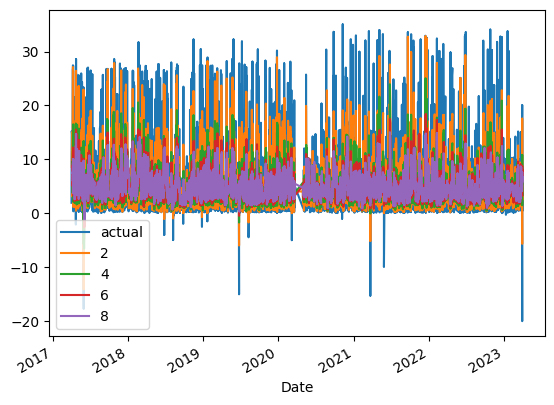

In [166]:
# Plot with Moving Averages
df4.Quantity.plot(label = "actual")
for i in range(2, 9, 2):
    df4["Quantity"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 3)




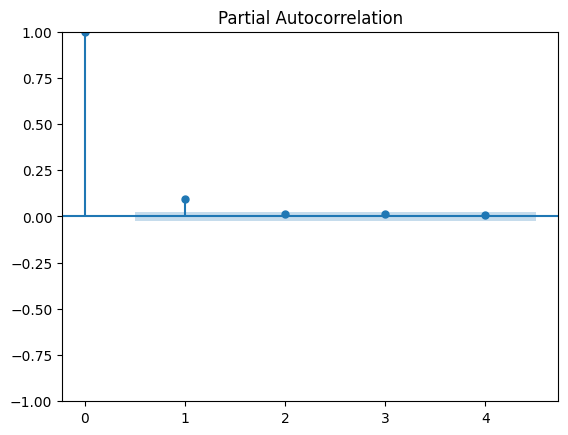

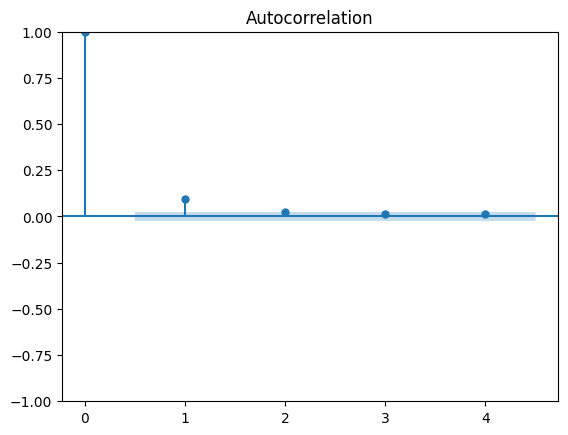

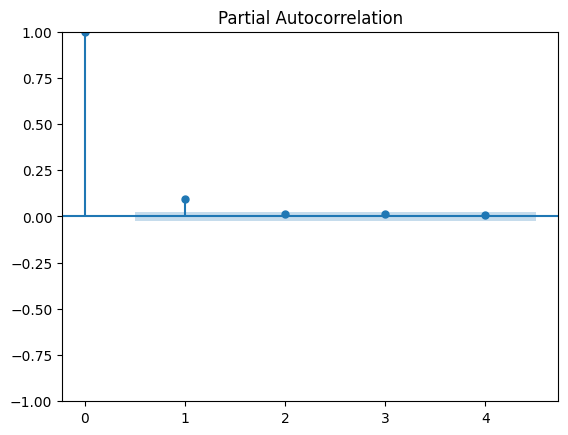

In [167]:
# ACF and PACF plot on Original data sets 
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df4.Quantity, lags = 4)
tsa_plots.plot_pacf(df4.Quantity, lags = 4)
# ACF is an (complete) auto-correlation function gives values 
# of auto-correlation of any time series with its lagged values.

# PACF is a partial auto-correlation function. 
# It finds correlations of present with lags of the residuals of the time series



In [239]:
# Fit the SES model
ses_model = SimpleExpSmoothing(Train["Quantity"]).fit()

# Generate predictions for the Test time range
pred_ses = ses_model.forecast(steps=len(Test))

# Create a DataFrame for predictions
pred_df = pd.DataFrame({'pred_ses': pred_ses}, index=Test.index)

# Calculate the MAPE
ses = MAPE(Test["Quantity"], pred_ses)

# Print the MAPE
print("Mean Absolute Percentage Error (SES):", ses)


Mean Absolute Percentage Error (SES): 4.597825418934092


C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [182]:
# Fit the Holt's model
hw_model = Holt(Train["Quantity"]).fit()

# Generate predictions for the Test time range
pred_hw = hw_model.forecast(steps=len(Test))

# Create a DataFrame for predictions
pred_df1 = pd.DataFrame({'pred_hw': pred_hw}, index=Test.index)

# Calculate the MAPE
hw = MAPE(Test["Quantity"], pred_hw)

# Print the MAPE
print("Mean Absolute Percentage Error (Holt's):", hw)


C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Mean Absolute Percentage Error (Holt's): 177.94219787074584


In [183]:
# Fit the Holt's Winter Exponential Smoothing model with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Quantity"], seasonal="add", trend="add", seasonal_periods=4).fit()

# Generate predictions for the Test time range
pred_hwe_add_add = hwe_model_add_add.forecast(steps=len(Test))

# Create a DataFrame for predictions
pred_df2 = pd.DataFrame({'pred_hwe_add_add': pred_hwe_add_add}, index=Test.index)

# Calculate the MAPE
hwe = MAPE(Test["Quantity"], pred_hwe_add_add)

# Print the MAPE
print("Mean Absolute Percentage Error (Holt's Winter - Additive Seasonality & Trend):", hwe)


C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Mean Absolute Percentage Error (Holt's Winter - Additive Seasonality & Trend): 12.362525557463792


C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [184]:
# comparing all mape's
di = pd.Series({'Simple Exponential Method':ses, 'Holt method ':hw, 'hw_additive seasonality and additive trend':hwe})
mape = pd.DataFrame(di, columns=['mape'])
mape


,mape
Simple Exponential Method,4.597825
Holt method,177.942198
hw_additive seasonality and additive trend,12.362526


In [185]:
# Final Model on 100% Data
ses_model = SimpleExpSmoothing(df4["Quantity"]).fit()

# The models and results instances all have a save and load method, so you don't need to use the pickle module directly.
# to save model
ses_model.save("model_with_noise_dd_2.pickle")



C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\MsK_PC\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [213]:
df4

,FY,Quantity,Value,April,August,December,February,January,July,June,March,May,November,October,September,t,t_square,log_Quantity
Date,,,,,,,,,,,,,,,,,,
2017-04-03,FY 18,1.93,79516.00,True,False,False,False,False,False,False,False,False,False,False,False,0,0,0.657520
2017-04-04,FY 18,15.24,578757.14,True,False,False,False,False,False,False,False,False,False,False,False,0,0,2.723924
2017-04-06,FY 18,14.62,606730.00,True,False,False,False,False,False,False,False,False,False,False,False,0,0,2.682390
2017-04-06,FY 18,3.03,124230.00,True,False,False,False,False,False,False,False,False,False,False,False,0,0,1.108563
2017-04-07,FY 18,5.15,210120.00,True,False,False,False,False,False,False,False,False,False,False,False,0,0,1.638997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-07,FY 23,9.98,618261.00,False,False,False,False,False,False,False,True,False,False,False,False,72,5184,2.300583
2023-03-10,FY 23,15.16,958112.00,False,False,False,False,False,False,False,True,False,False,False,False,72,5184,2.718660
2023-03-23,FY 23,2.09,126236.00,False,False,False,False,False,False,False,True,False,False,False,False,72,5184,0.737164


<Figure size 1200x800 with 0 Axes>

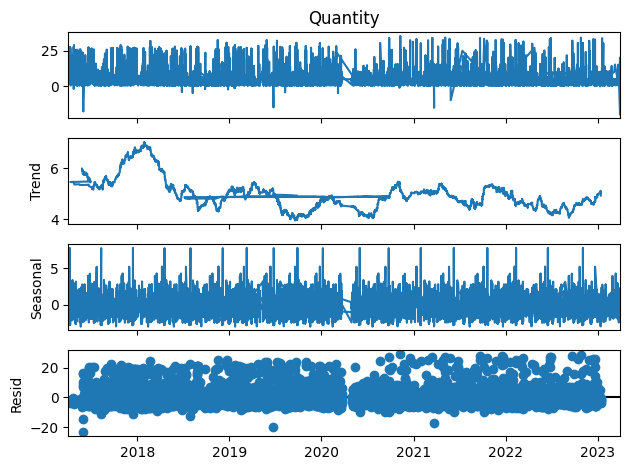

In [238]:
# Perform seasonal decomposition
result = seasonal_decompose(df4["Quantity"], model="additive", period=365)

# Plot the decomposed components
plt.figure(figsize=(12, 8))
result.plot()
plt.show()